In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import unittest
import tqdm.notebook as tq
import solitaire_env_easy as solitaire_env_easy
import solitaire_env_hard as solitaire_env_hard
import sys
import seaborn as sns
import pickle as pkl
#sys.setrecursionlimit(10**6)

In [4]:
def greedy_policy(en,tot,action_freq,actions_matrix,game,fp_flag=True,debug=[False,False,False,False,False,False]):
    
    actions_m = []
    
    start_state = en.copy_state()
    
    game_states = [start_state]
    
    for step in range(tot):
        
        for action in [0,1,2,3,4,5]:
            
            
            won,taken = en.step(action,fp_flag,debug=debug)
            
            if en.consistent == False:
                
                game_states.append(en.state)
                actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,"No action could be taken",en.action_description] 

                return "not consistent",False
            if won == True:
                action_freq[action]+=1
                
                actions_m.append(action)
                
                game_states.append(en.state)
                
                actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,"won",en.action_description] 
                
                
                return len(actions_m),True
            
            if taken == True:
                action_freq[action]+=1
                
                actions_m.append(action)
                game_states.append(en.state)
                
                break

        if taken == False:
            
            actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,"No action could be taken",en.action_description] 
            
            return len(actions_m),False
        
       
    actions_matrix[game] = [game,actions_m,en.state,start_state,game_states,"Steps exhausted",en.action_description] 
    
    return len(actions_m),False
        

In [5]:

start = time.time()


count = 0

number_of_games = 2000

action_type = {0:'tableau_to_foundation_reveal',\
               1:'to_foundation_stack',2:'tableau_to_tableau_reveal',\
               3:'pile_to_tableau',\
                4:'foundation_to_tableau',\
               5:'tableau_to_tableau_not_reveal'\
              }


actions_for_each_game = [0]*number_of_games
iterations_used_per_game = [0]*number_of_games
different_states_per_game = [0]*number_of_games


        
actions_matrix = [0]*number_of_games
description = []

debug = [False,False,False,False,True,False]
for this_game in tq.tqdm(range(number_of_games)):
    
    
    en = solitaire_env_hard.env()
    tot = 20000
    action_freq = {0:0,1:0,2:0,3:0,4:0,5:0}
    
    
    step,won = greedy_policy(en,tot,action_freq,actions_matrix,this_game,fp_flag=True,debug=debug)
    
    if step == "not consistent":
        print(step,this_game)
        break
    if won == True:
        count+=1
        
    actions_for_each_game[this_game] = action_freq
    different_states_per_game[this_game] = len(en.hashable_map.keys())
    iterations_used_per_game[this_game] = step
    
print((time.time()-start)/60)

***************start foundation ******************************



TypeError: print_card() missing 1 required positional argument: 'i'

In [4]:
win_percent = (count*100) / number_of_games

In [5]:
win_percent

10.7

In [6]:
count

213

In [16]:
it = pd.DataFrame(data = {"iterations":iterations_used_per_game}).sort_values(by=['iterations'],ascending=False)

In [17]:
it.head(20)

,iterations
1646,1637
1444,1316
1865,670
1744,611
1443,491
162,459
400,444
1606,439
109,436
1666,424


In [10]:
max_step_taken = max(it.iterations)
max_step_taken

2670

Int64Index([  12,   14,   18,   11,    9,   22,    7,   10,   15,    8,
            ...
             201,  197,  183,  195,  194,  192,  190,  189,  186, 1951],
           dtype='int64', length=232)


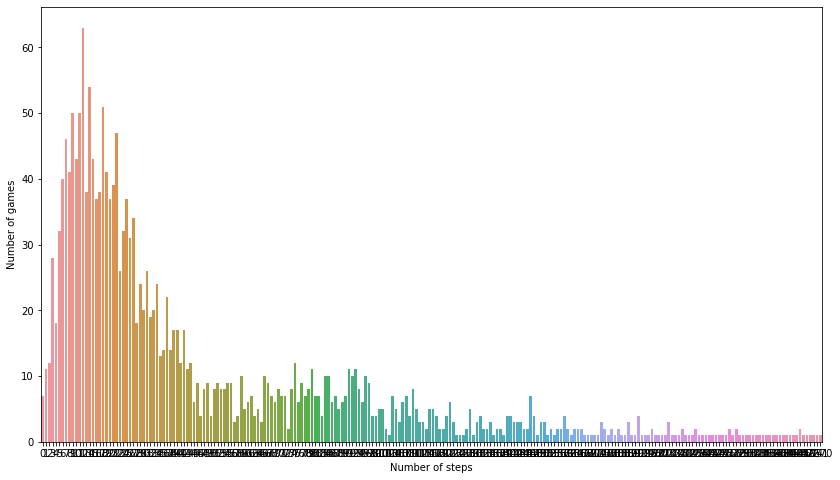

In [11]:
v = it['iterations'].value_counts()
print(v.index)
plt.figure(figsize=(14,8))
plt.xlabel("Number of steps")
plt.ylabel("Number of games")
sns.barplot(v.index,v.values)
plt.savefig("Foundation_Progression_included.jpg")

### Save results from this run

In [ ]:
name = "games/run_hardgame_" + str(pd.Timestamp.now()) +".pkl"
print(name)
run_data = {
    "actions_matrix":actions_matrix,
    "actions_for_each_game":actions_for_each_game,
    "different_states_per_game":different_states_per_game,
    "iterations_used_per_game":iterations_used_per_game
}
with open(name,"wb") as file:
    pkl.dump(run_data,file)

In [65]:
def compare_states(state1,state2):

    def compare_cards(card1,card2):
        
        if card1.number == card2.number and card1.face == card2.face and card1.suit == card2.suit:
            return True
        
        return False
    
    
    def check_pile(p1,p2):

        if len(p1) != len(p2):
            return False

        for cd1,cd2 in zip(p1,p2):
            
            if compare_cards(cd1,cd2) is False:
                return False
            
            
        return True
    
    def check_tableau(t1,t2):
        
        for i in range(7):
            if len(t1[i]) != len(t2[i]):
                return False
            for cd1,cd2 in zip(t1[i],t2[i]):
                if compare_cards(cd1,cd2) is False:
                    return False
    
        return True
    
    def check_foundation(f1,f2):
        
        for i in range(4):
                if len(f1[i]) != len(f2[i]):
                    return False
                for cd1,cd2 in zip(f1[i],f2[i]):
                    if compare_cards(cd1,cd2) is False:
                        return False

        return True
    
    
    
    comp =  check_foundation(state1.foundation,state2.foundation) and check_pile(state1.pile,state2.pile) and \
            check_tableau(state1.tableau,state2.tableau)
    
    return comp